In this Exploratory Data Analysis (EDA), 

- Descriptive statistics of the 2021 dataset
- Correlation among the variables
- Happines Score distribution over the regions
- Descriptive statistics of 2021 dataset for Central and Eastern Europe region
- Happiness Score's trend in 2021 and the previous years at the Central and Eastern Europe.


- First thing first, lets' import the related libraries for further analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline


import plotly 
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots

World Happiness Report 2021 and World Happines Report (which includes data before 2021) will be used in this Exploratory Data Analysis (EDA) 

In [2]:
df_2021 = pd.read_csv('../input/world-happiness-report-2021/world-happiness-report-2021.csv')
df_past = pd.read_csv("../input/world-happiness-report-2021/world-happiness-report.csv")

In [3]:
df_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
df_2021.shape

(149, 20)

In [5]:
df_past.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [6]:
df_past.shape

(1949, 11)

- For the sake of the further analysis we will rename the column names in the old dataset.

In [7]:
df_past = df_past.rename(columns={'Life Ladder':'Ladder score', 'Log GDP per capita':'Logged GDP per capita','Healthy life expectancy at birth':'Healthy life expectancy'})

In [8]:
df_past.sample(1)

,Country name,year,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
882,Kazakhstan,2013,5.835,10.074,0.889,61.76,0.782,-0.229,0.82,0.674,0.164


In this EDA, areas of interest will be 
- 'Country name',
- 'Regional indicator',
- 'Ladder score',
- 'Logged GDP per capita',
- 'Social support',
- 'Healthy life expectancy',
- 'Freedom to make life choices',
- 'Generosity',
- 'Perceptions of corruption' 

For that reason we will make further adjustments.

In [9]:
df1_2021= df_2021[['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']].copy() 


In [10]:
df1_2021.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


- Let's look for the general information about the data and see whether any missing values to deal with.

In [11]:
df1_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  149 non-null    object 
 1   Regional indicator            149 non-null    object 
 2   Ladder score                  149 non-null    float64
 3   Logged GDP per capita         149 non-null    float64
 4   Social support                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Generosity                    149 non-null    float64
 8   Perceptions of corruption     149 non-null    float64
dtypes: float64(7), object(2)
memory usage: 10.6+ KB


- So far so good

- General statistical information on the 2021 world happiness report

In [12]:
df1_2021.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


- Let's see the correlation among the numerical variables in the dataset

In [13]:
df1_2021.corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


Even though, based on the domain, high level correlation is interpreted differently (some of the areas %80 or above is a good sign of the string correlation, for some areas it will be aroun %60)

- With keeping that in mind, Happiness score(Ladder Score) has strong level correlation with GDP, Social Support, Healthy life Expectancy.

- Freedom to make life choice and happiness score have mid level correlation between them.

- Perception of corruption and happiness score have weak level negative level correlation between them.

To see that relationships from differnt visualization, heatmap will be used further.

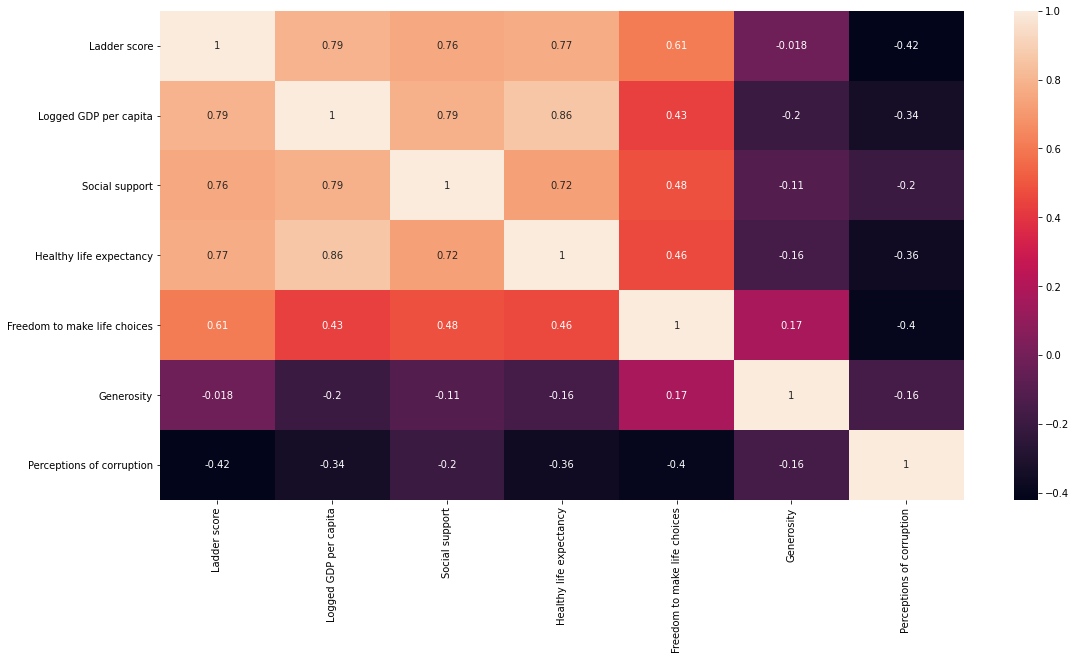

In [14]:
plt.figure(figsize=(18,9))
sns.heatmap(df1_2021.corr(),annot=True);

Before moving on the Central and Eastern Europe, let's see the happines score at the Regional Level

In [15]:
df1_2021.groupby('Regional indicator')['Ladder score'].describe()

,count,mean,std,min,25%,50%,75%,max
Regional indicator,,,,,,,,
Central and Eastern Europe,17.0,5.984765,0.493325,5.101,5.81300,6.0780,6.25500,6.965
Commonwealth of Independent States,12.0,5.467000,0.438116,4.875,5.14475,5.4715,5.74950,6.179
East Asia,6.0,5.810333,0.439913,5.339,5.52700,5.7610,5.91625,6.584
Latin America and Caribbean,20.0,5.908050,0.693467,3.615,5.75200,5.9920,6.31100,7.069
Middle East and North Africa,17.0,5.219765,0.999259,3.658,4.58400,4.8870,6.10600,7.157
North America and ANZ,4.0,7.128500,0.138057,6.951,7.06500,7.1430,7.20650,7.277
South Asia,7.0,4.441857,0.993462,2.523,4.07200,4.9340,5.11150,5.269
Southeast Asia,9.0,5.407556,0.606271,4.426,5.03000,5.3840,5.88000,6.377
Sub-Saharan Africa,36.0,4.494472,0.654892,3.145,4.09850,4.6160,4.99925,6.049


Based on the above information, it is easily seen that, 
- Western Europe has the highest level happiness score, 

on the other hand;

- South Asia and Sub-Saharan Africa have the lowest level happiness score amongst the regions.

- Let's look at the boxplot to see overall distribution of the happiness score at the different regions.


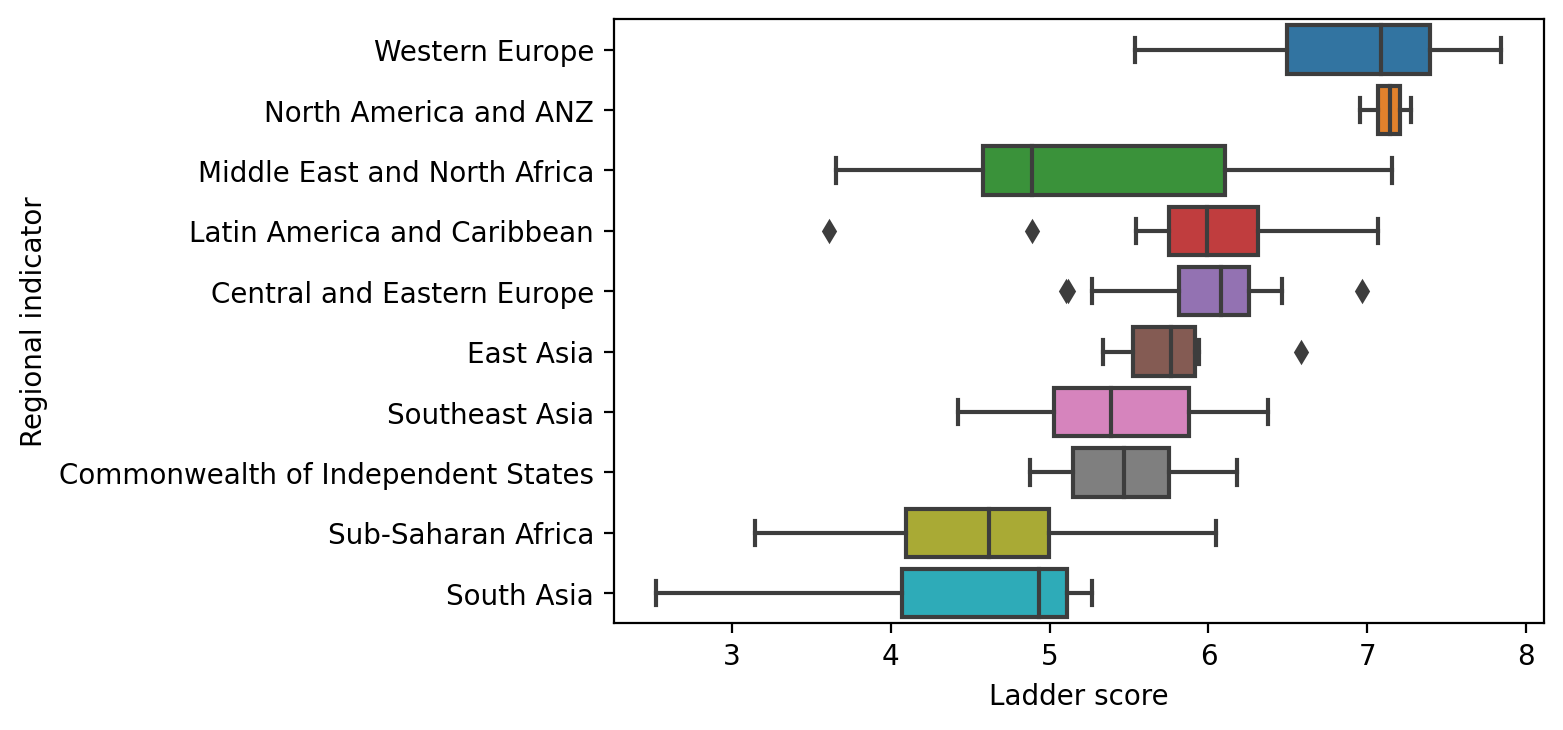

In [16]:
plt.figure(figsize=(6,4),dpi=200)
sns.boxplot(x='Ladder score', y='Regional indicator', data=df1_2021);

In the boxplot, based on the happines score distributions on the regions, several outliers were seen in the:

- Latin America and Caribbean
- Central and Eastern Europe
- East Asia


- After this point, let's look in detail to the Central and Eastern Europe part of the dataset.

In [17]:
center_east_europe = df1_2021[df1_2021['Regional indicator']=='Central and Eastern Europe']

center_east_europe

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
17,Czech Republic,Central and Eastern Europe,6.965,10.556,0.947,70.807,0.858,-0.208,0.868
28,Slovenia,Central and Eastern Europe,6.461,10.529,0.948,71.400,0.949,-0.101,0.806
32,Kosovo,Central and Eastern Europe,6.372,9.318,0.821,63.813,0.869,0.257,0.917
33,Slovakia,Central and Eastern Europe,6.331,10.369,0.936,69.201,0.766,-0.124,0.911
37,Lithuania,Central and Eastern Europe,6.255,10.499,0.935,67.906,0.773,-0.203,0.826
39,Estonia,Central and Eastern Europe,6.189,10.481,0.941,68.800,0.909,-0.106,0.527
43,Poland,Central and Eastern Europe,6.166,10.382,0.898,69.702,0.841,-0.165,0.735
45,Romania,Central and Eastern Europe,6.140,10.284,0.832,67.355,0.845,-0.219,0.938
47,Serbia,Central and Eastern Europe,6.078,9.787,0.873,68.600,0.778,0.002,0.835
50,Latvia,Central and Eastern Europe,6.032,10.315,0.927,67.100,0.715,-0.162,0.800


- Let's see how correlated the variables in Central and Eastern Europe.

In [18]:
center_east_europe.corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.560664,0.582957,0.333319,0.518679,-0.276712,-0.245990
Logged GDP per capita,0.560664,1.000000,0.775892,0.597408,0.318199,-0.881543,-0.428930
Social support,0.582957,0.775892,1.000000,0.389284,0.158672,-0.507258,-0.318341
Healthy life expectancy,0.333319,0.597408,0.389284,1.000000,0.217689,-0.550233,-0.230517
Freedom to make life choices,0.518679,0.318199,0.158672,0.217689,1.000000,-0.084180,-0.410780
Generosity,-0.276712,-0.881543,-0.507258,-0.550233,-0.084180,1.000000,0.220205
Perceptions of corruption,-0.245990,-0.428930,-0.318341,-0.230517,-0.410780,0.220205,1.000000


Even though some similarities can be found with the whole 2021 Happines Score correlation matrix, happiness score's correlation with the other variables in Central and Eastern Europe is considerably lower than whole dataset correlation matrix results.

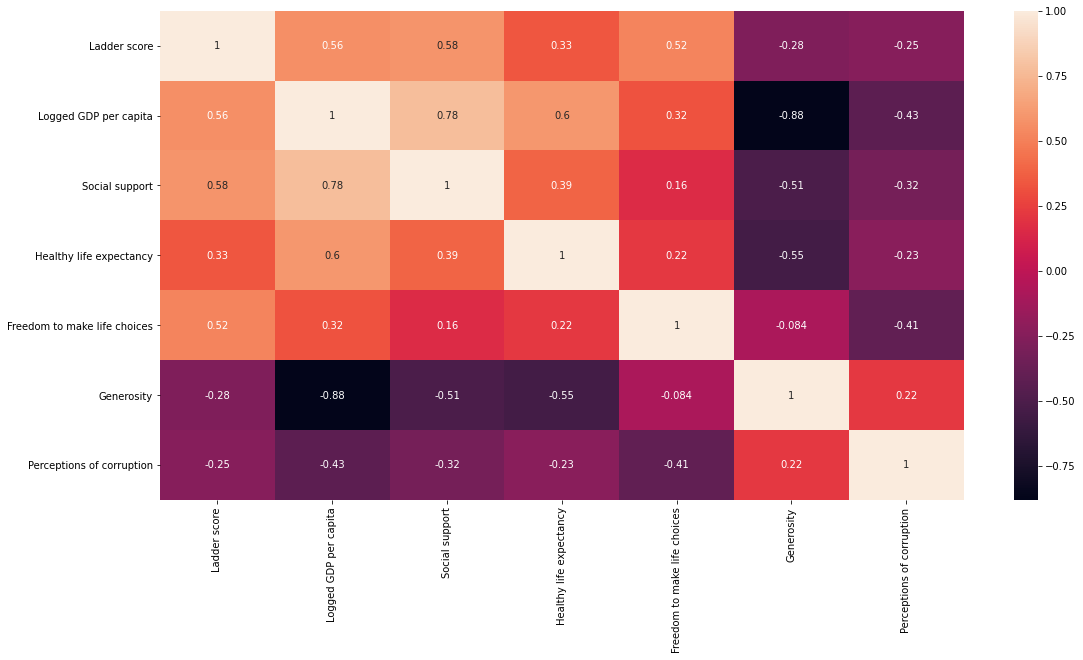

In [19]:
plt.figure(figsize=(18,9))
sns.heatmap(center_east_europe.corr(),annot=True);

In [20]:
center_east_europe.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,5.984765,10.109059,0.887412,68.338412,0.797059,-0.078941,0.850529
std,0.493325,0.396190,0.068297,1.909003,0.070521,0.126697,0.102474
min,5.101000,9.318000,0.697000,63.813000,0.706000,-0.219000,0.527000
25%,5.813000,9.787000,0.858000,67.355000,0.754000,-0.165000,0.812000
50%,6.078000,10.284000,0.924000,68.600000,0.778000,-0.106000,0.876000
75%,6.255000,10.382000,0.936000,69.201000,0.845000,-0.030000,0.917000
max,6.965000,10.556000,0.948000,71.400000,0.949000,0.257000,0.939000


Based on the descriptive information, based on the Mean-Median differences and  IQRs (InterQuartile Ranges) possible outliers can be seen in the:

- Happiness Score
- Social Support
- Healthy life expectancy
- Generosity
- Perceptions of corruption

- For the sake of the simplicity, in this EDA we will focus on Happiness Score.

For further detail, let's make a boxplot, barplot and use Plotly's interactive environment.

### Happiness in the Central and Eastern Europe

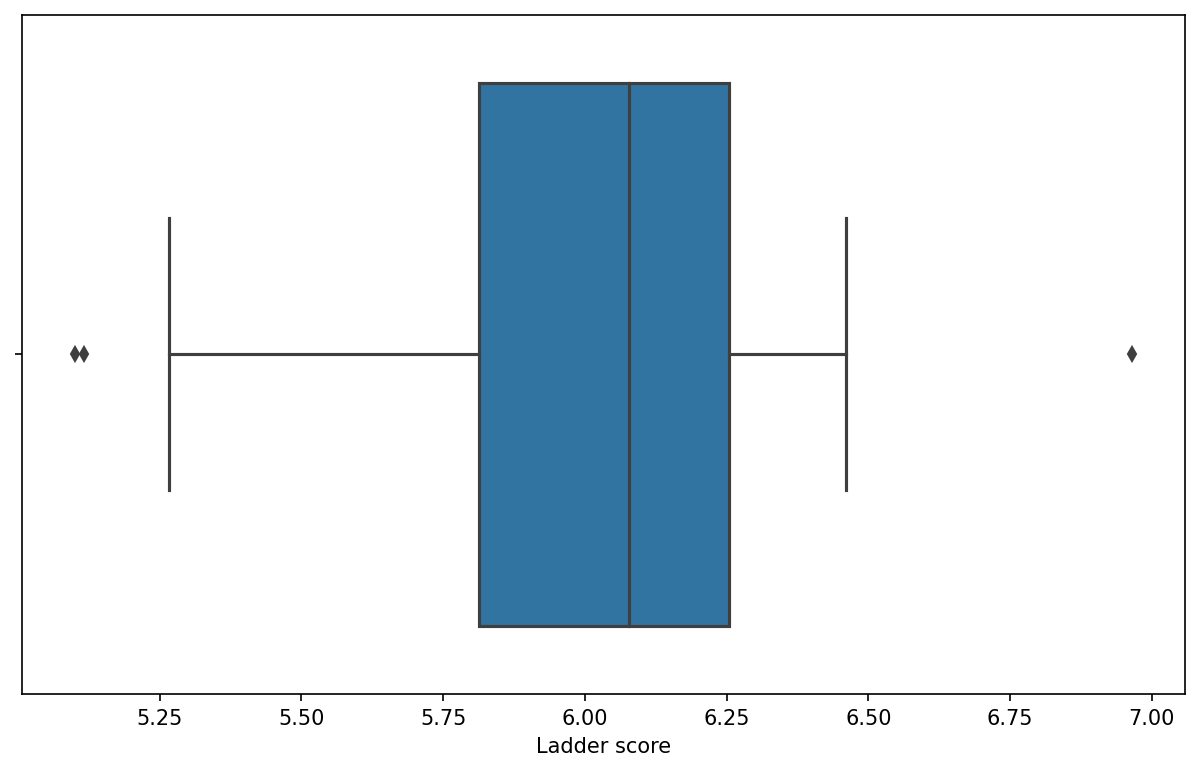

In [21]:
plt.figure(figsize=(10,6), dpi=150)
sns.boxplot(x= 'Ladder score', data= center_east_europe, orient='h');

In the Central and Eastern Europe, based on the happiness score distributions, 3 possible outliers can be seen.
One outlier is at the high score side of the happiness score and other two outliers are at the minimum side of the happiness score.

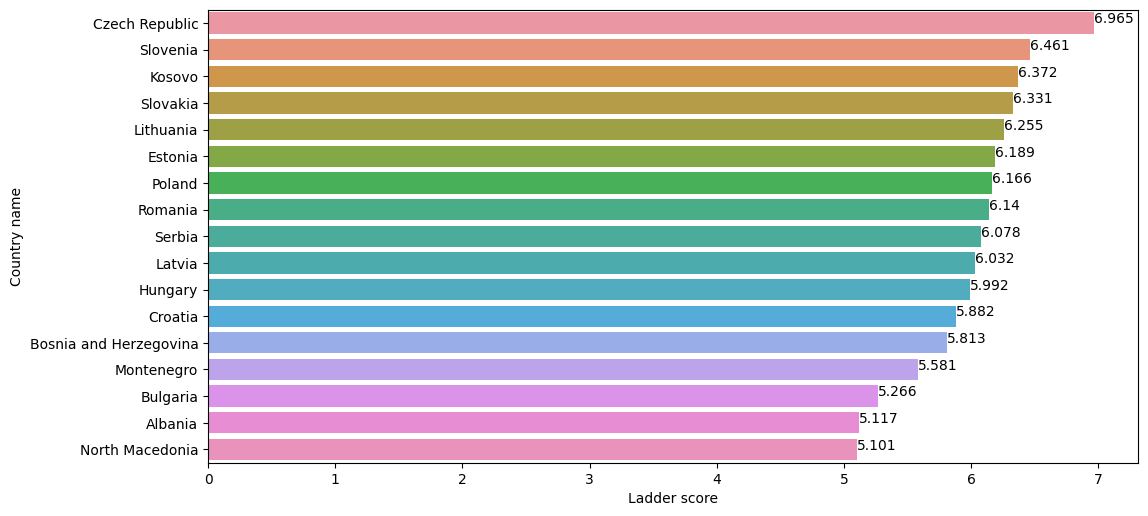

In [22]:
plt.figure(figsize=(12,6),dpi=100)
sns.barplot(y='Country name', x='Ladder score', data=center_east_europe);
for i, v in enumerate(center_east_europe['Ladder score']):
    plt.text(v, i, str(v))

As seen in the barplot, 
- **Czech Republic** has the highest happiness score in the Central and Eastern Europe.
- **Albania** and **North Macedonia** have the lowest happiness score in the Central and Eastern Europe.
- These three country are possible outliers based on the happiness score distribution in the Central and Eastern Europe.

By using Plotly interactive environment we can see the differences among the countries in the Central and Eastern Europe on the Happiness Score

In [23]:
fig=go.Figure()
fig.add_trace(go.Scatter(
    x=center_east_europe['Country name'],
    y=center_east_europe['Ladder score'],
    name='Happines Score',
    mode='markers+text',
    marker_color='white',
    marker_size=10,
    text=center_east_europe['Ladder score'],
    textposition='top center',
    line=dict(color='red',dash='dash'),
))
fig.update_layout(
    title= "<b>Center East Europe Happiness Score in 2021</b>",
    xaxis_title="<b>Country</b>",
    yaxis_title="<b>Happiness Score</b>",
    template='plotly_white',
    font=dict(
        size=12,
        color="Black",
        family="Oswald', sans-serif"
        ),
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False),
    plot_bgcolor='lightgray',
    yaxis2=dict(showgrid=True,overlaying='y',side='right',title='<b>Happiness Score</b>'),
    legend=dict(yanchor="top",
    y=1.3,
    xanchor="left",
    x=0.78)
)
fig.show()

- After seeing the 2021 happines score it would be good idea to see how was the happpiness score trends in the past years.
- Let's look at the previous years happines score for all the countries in the region. 

In [24]:
css3_colors = ['#add8e6', '#f08080','#e0ffff','#fafad2','#d3d3d3','#90ee90','#ffb6c1','#ffa07a','#20b2aa','#87cefa','#778899','#b0c4de','#32cd32','#ff00ff','#66cdaa','#ba55d3', '#7b68ee','#48d1cc', '#f5fffa' ]
css3_dict ={}
i=0
for name in center_east_europe['Country name']:
    css3_dict[name]=css3_colors[i]
    i+=1

In [25]:
center_east_europe_past=df_past[df_past['Country name'].isin(center_east_europe['Country name'].to_list())].loc[:,'Country name':'Ladder score']


In [26]:
fig=go.Figure()
for name in center_east_europe['Country name']:
    fig.add_trace(go.Scatter(
    x=center_east_europe_past[center_east_europe_past['Country name']==name]['year'],
    y=center_east_europe_past[center_east_europe_past['Country name']==name]['Ladder score'],
    name=name,
    mode='markers+text+lines',
    marker_color='black',
    marker_size=3,
    line=dict(color=css3_dict[name]),
    yaxis='y1'))
    
fig.update_layout(
    title="Happiness Score Trend in Central and Eastern Europe ",
    xaxis_title="Year",
    yaxis_title='Happiness Score',
    template='plotly_white',
    font=dict(
        size=14,
        color="Blue",
        family="Oswald', sans-serif"
    ),
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True)
)
fig.show()

- After this point let's look at the Happiness Score relation with the other variables in the region.
- First we will look with seaborn scatterplot and then we will use plotly for interactive visualization.

## **Happiness Score & GDP** 

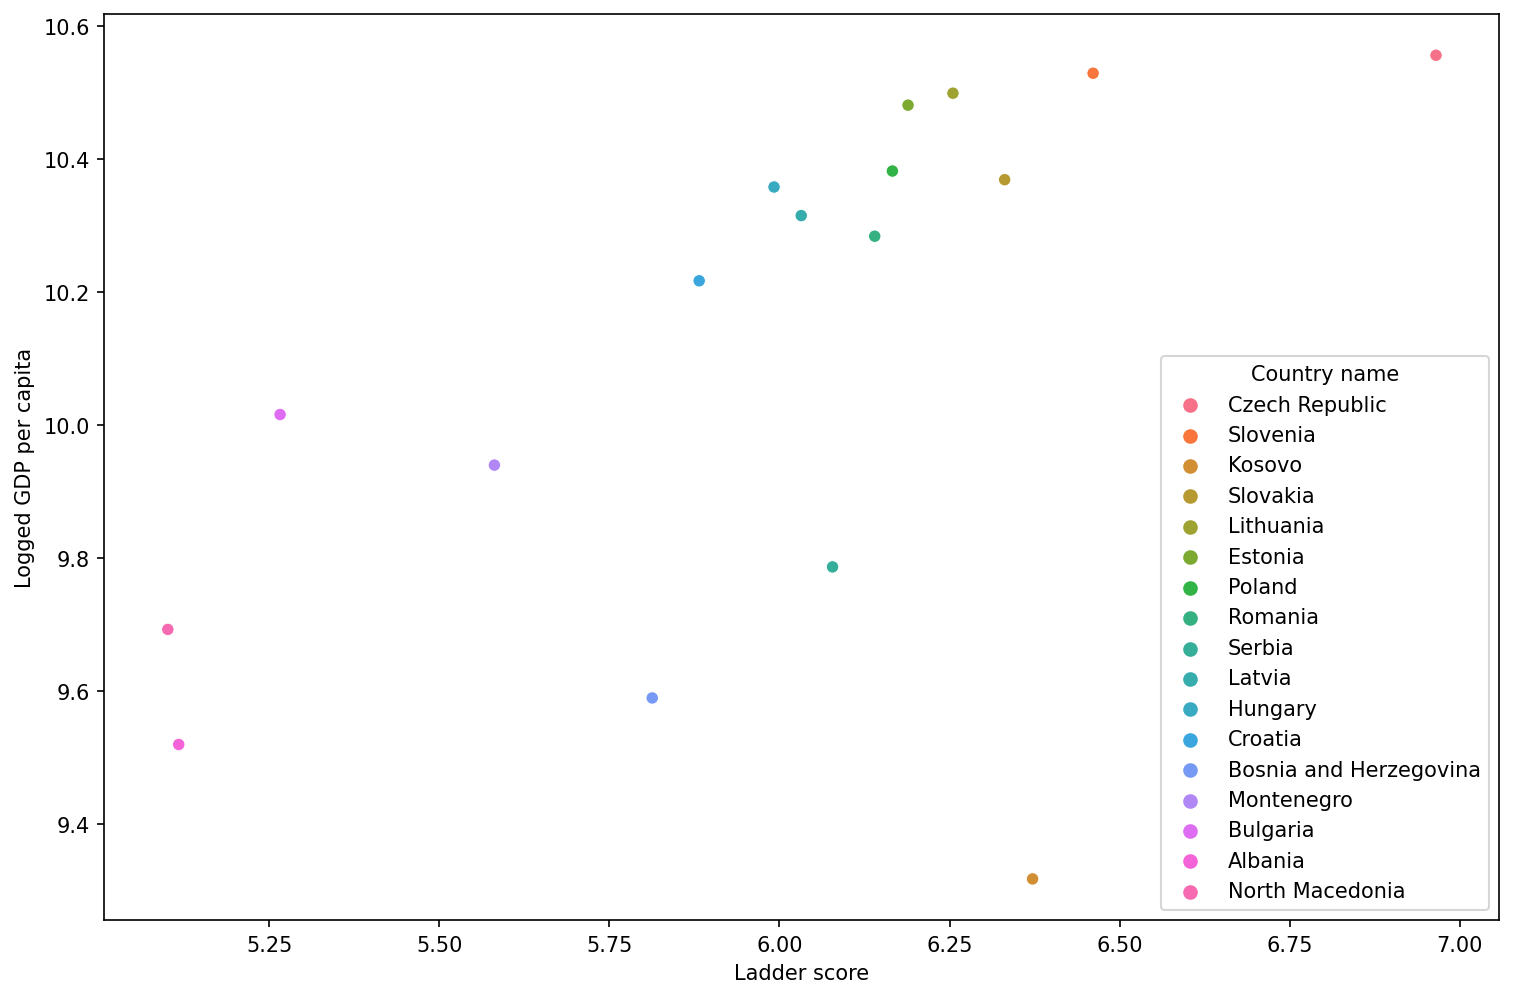

In [27]:
plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(x='Ladder score', y='Logged GDP per capita', hue= 'Country name',data= center_east_europe);

In [28]:
trace = go.Scatter(x = center_east_europe['Ladder score'],y=center_east_europe['Logged GDP per capita'],text = center_east_europe['Country name'],mode='markers',marker={'color':'blue'})
df=[trace]
layout = go.Layout(title='Happiness Score & Logged GDP per capita in Central Eastern Europe',xaxis=dict(title='Ladder Score'),yaxis=dict(title='Logged GDP per capita'),hovermode='closest')
figure = go.Figure(data=df,layout=layout)
figure.update_layout(template='plotly_white',
                  plot_bgcolor='#b0e0e6',
                  font=dict(family="Oswald', sans-serif"))
figure.show()

## **Happiness Score & Social Support** 

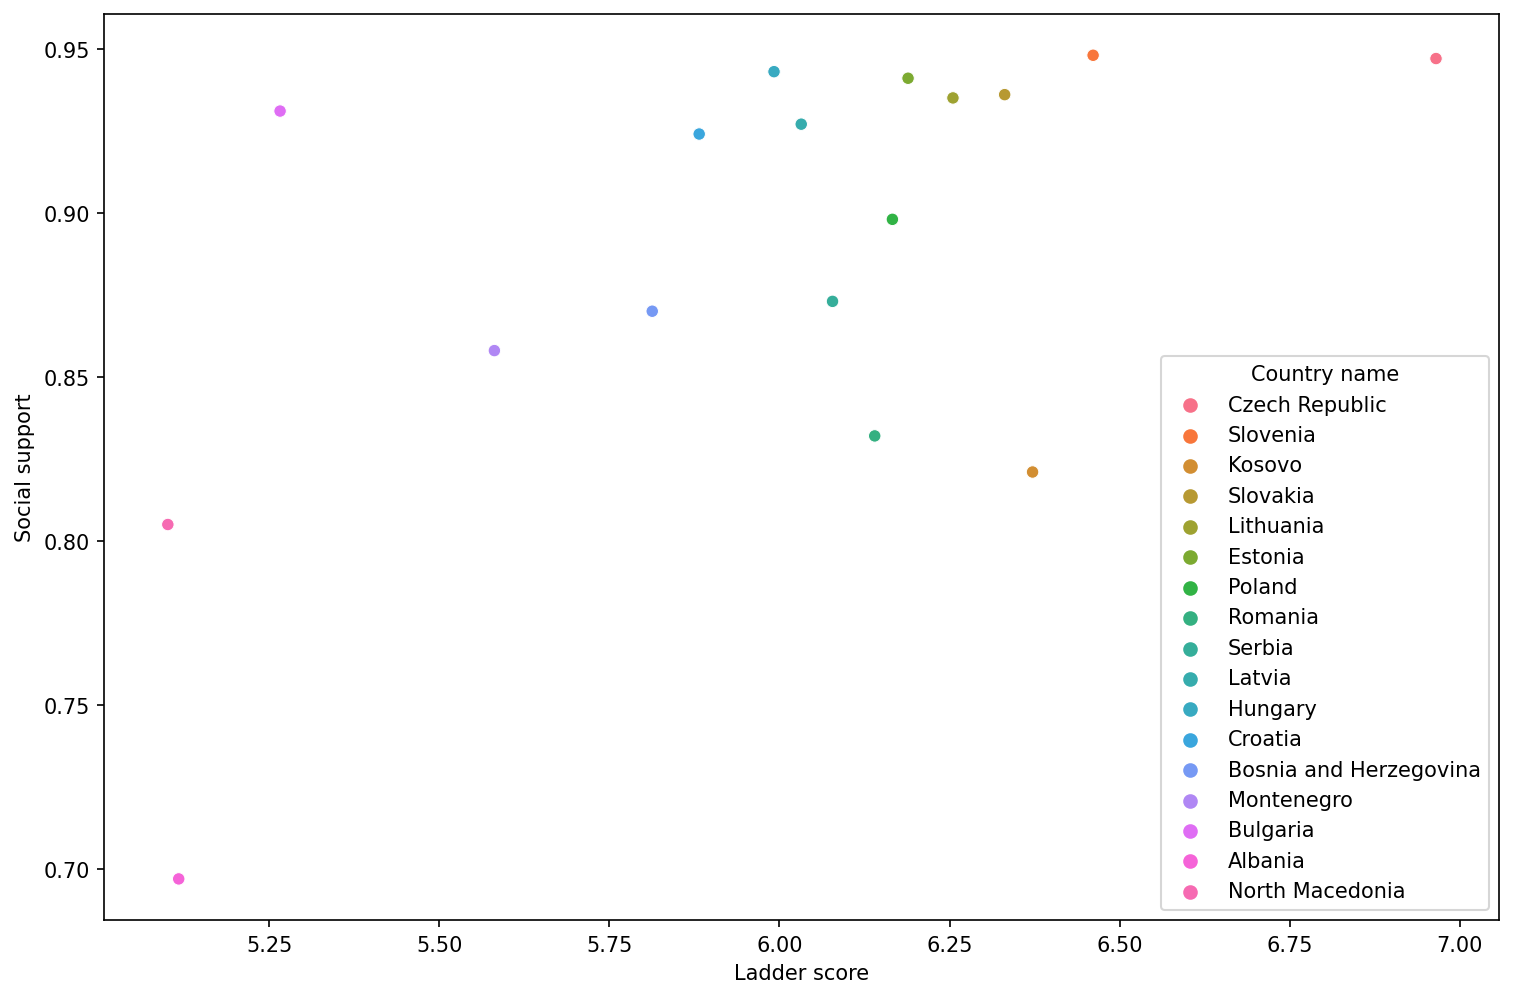

In [29]:
plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(x='Ladder score', y='Social support', hue= 'Country name',data= center_east_europe);

In [30]:
trace = go.Scatter(x = center_east_europe['Ladder score'],y=center_east_europe['Social support'],text = center_east_europe['Country name'],mode='markers',marker={'color':'blue'})
df=[trace]
layout = go.Layout(title='Happiness Score & Social Support in Central Eastern Europe',xaxis=dict(title='Ladder score'),yaxis=dict(title='Social Support'),hovermode='closest')
figure = go.Figure(data=df,layout=layout)
figure.update_layout(template='plotly_white',
                  plot_bgcolor='#b0e0e6',
                  font=dict(family="Oswald', sans-serif"))
figure.show()

## **Happiness Score & Perceptions of Corruption** 

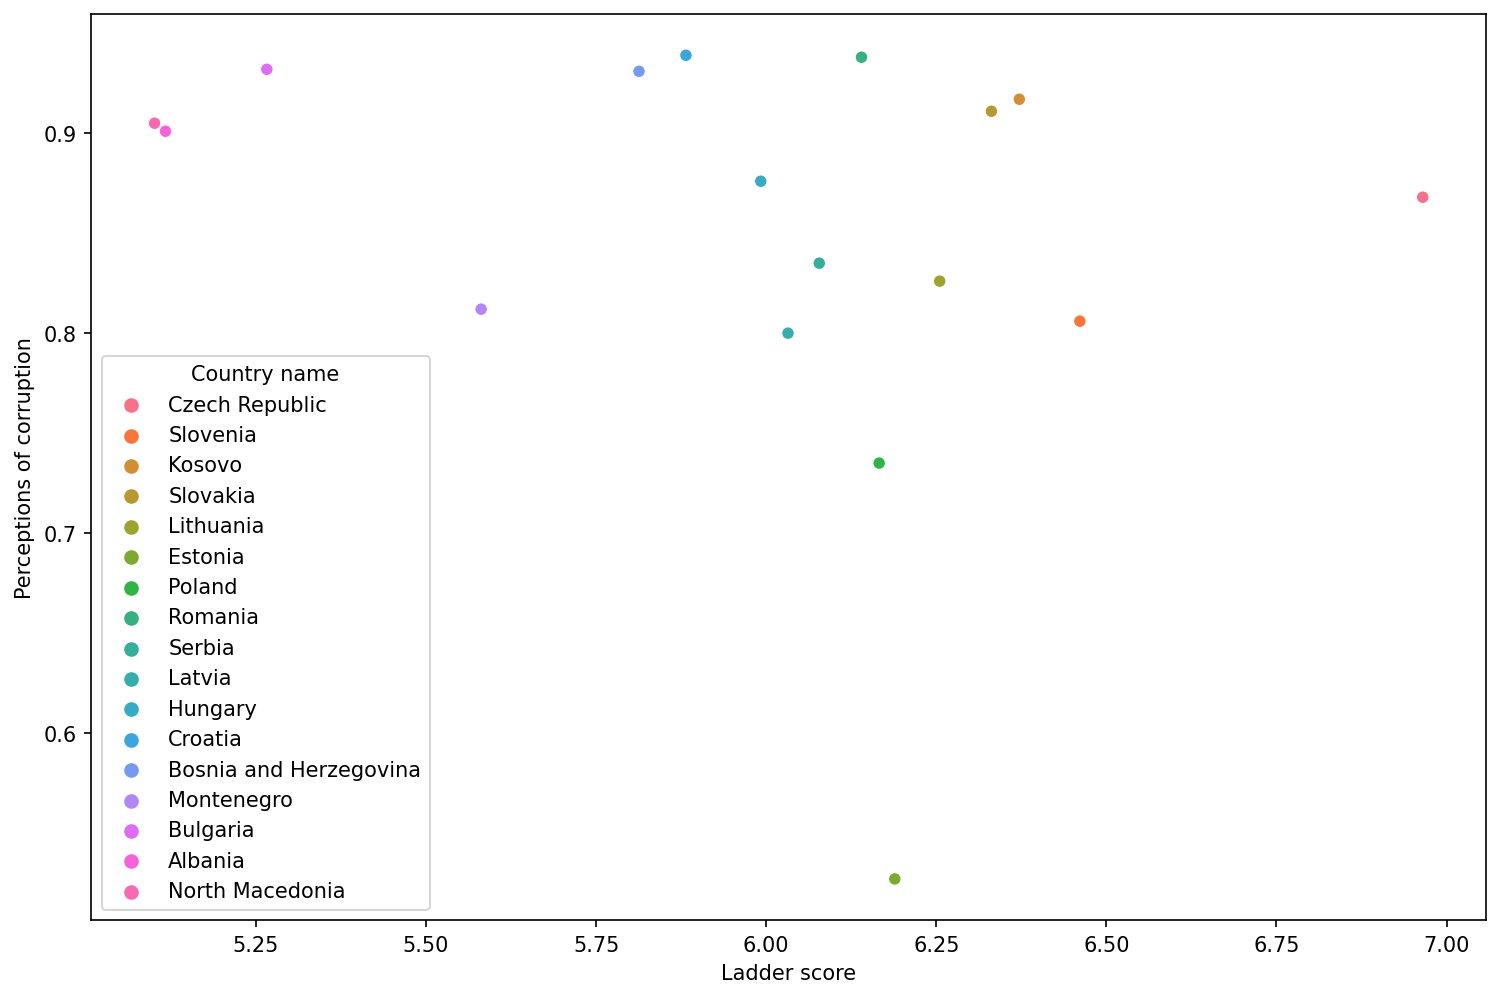

In [31]:
plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(x='Ladder score', y='Perceptions of corruption', hue= 'Country name',data= center_east_europe);

In [32]:
trace = go.Scatter(x = center_east_europe['Ladder score'],y=center_east_europe['Perceptions of corruption'],text = center_east_europe['Country name'],mode='markers',marker={'color':'blue'})
df=[trace]
layout = go.Layout(title='Happiness Score & Perceptions of Corruption in Central Eastern Europe',xaxis=dict(title='Ladder score'),yaxis=dict(title='Perceptions of corruption'),hovermode='closest')
figure = go.Figure(data=df,layout=layout)
figure.update_layout(template='plotly_white',
                  plot_bgcolor='#b0e0e6',
                  font=dict(family="Oswald', sans-serif"))
figure.show()

## **Happiness Score & Healthy Life Expectancy** 

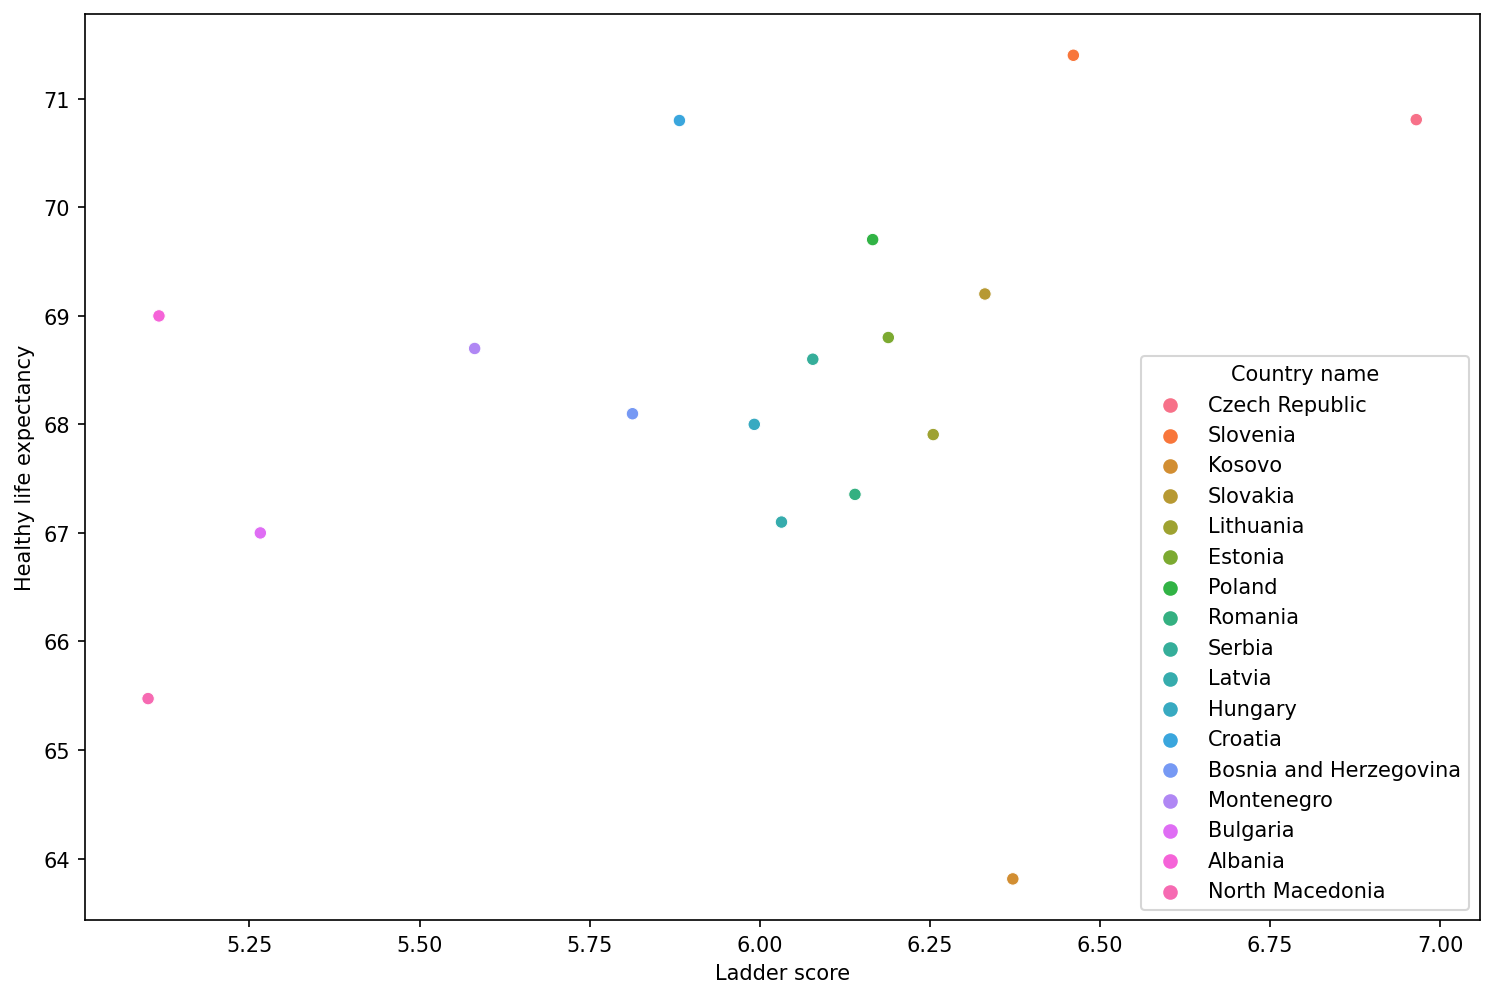

In [33]:
plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(x='Ladder score', y='Healthy life expectancy', hue= 'Country name',data= center_east_europe);

In [34]:
trace = go.Scatter(x = center_east_europe['Ladder score'],y=center_east_europe['Healthy life expectancy'],text = center_east_europe['Country name'],mode='markers',marker={'color':'blue'})
df=[trace]
layout = go.Layout(title='Happiness Score & Healthy Life Expectancy in Central Eastern Europe',xaxis=dict(title='Ladder score'),yaxis=dict(title='Healthy life expectancy'),hovermode='closest')
figure = go.Figure(data=df,layout=layout)
figure.update_layout(template='plotly_white',
                  plot_bgcolor='#b0e0e6',
                  font=dict(family="Oswald', sans-serif"))
figure.show()

## **Happiness Score & Freedom to Make Life Choices** 

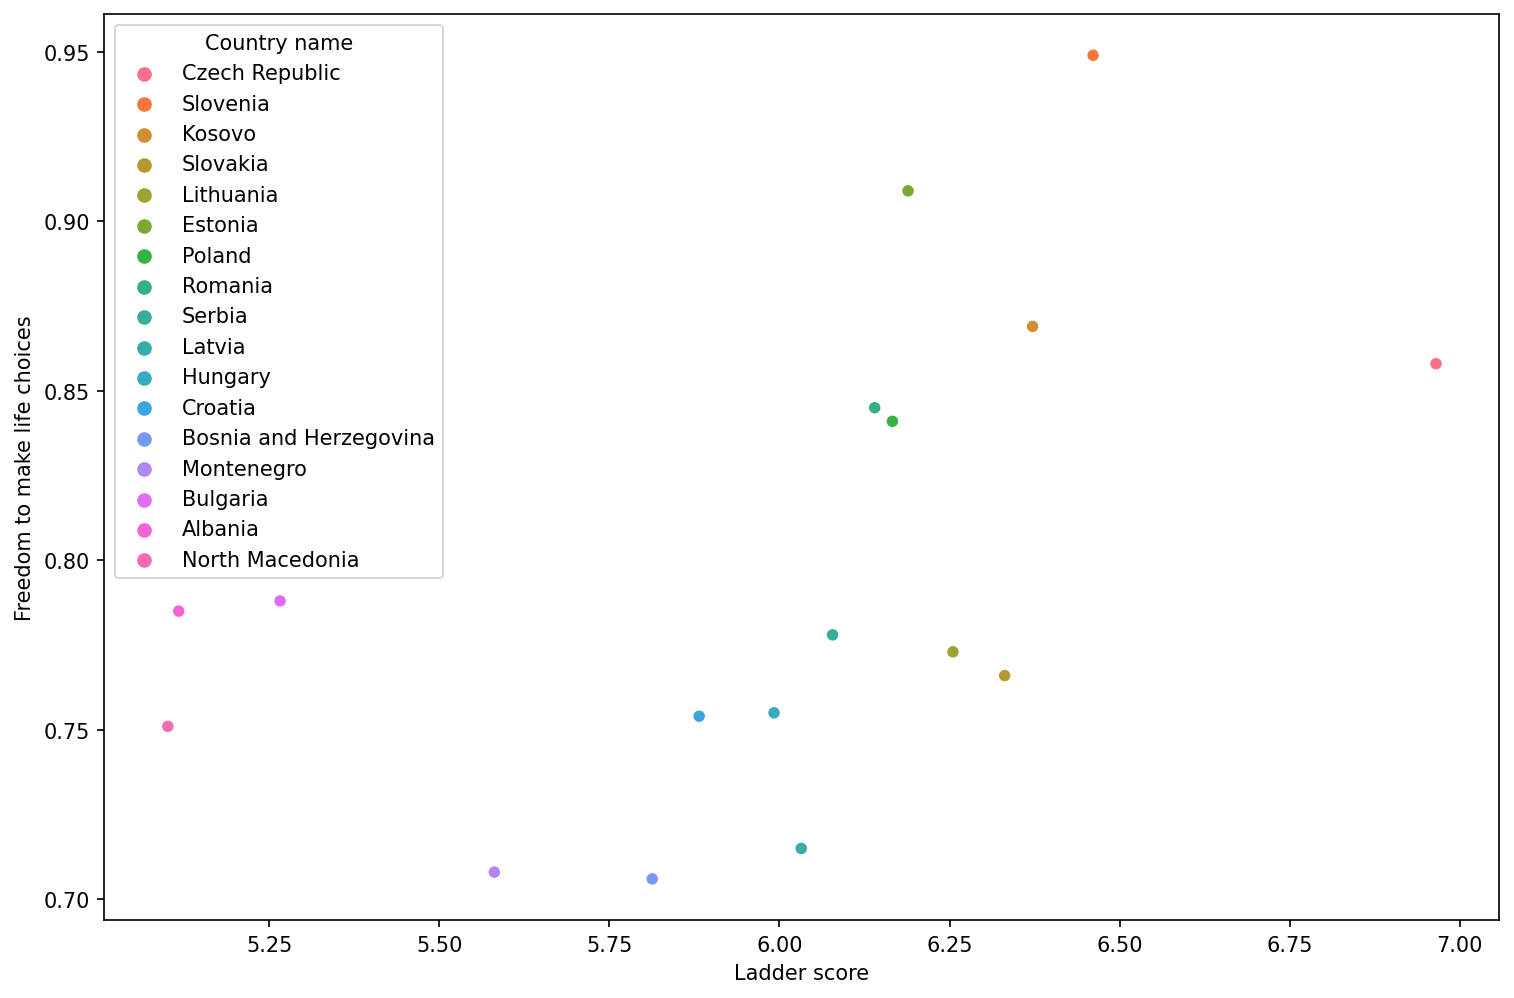

In [35]:
plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(x='Ladder score', y='Freedom to make life choices', hue= 'Country name',data= center_east_europe);

In [36]:
trace = go.Scatter(x = center_east_europe['Ladder score'],y=center_east_europe['Freedom to make life choices'],text = center_east_europe['Country name'],mode='markers',marker={'color':'blue'})
df=[trace]
layout = go.Layout(title='Happiness Score & Freedom to Make Life Choices in Central Eastern Europe',xaxis=dict(title='Ladder score'),yaxis=dict(title='Freedom to make life choices'),hovermode='closest')
figure = go.Figure(data=df,layout=layout)
figure.update_layout(template='plotly_white',
                  plot_bgcolor='#b0e0e6',
                  font=dict(family="Oswald', sans-serif"))
figure.show()

-Thanks for your time to read the Central and Eastern Europe's Happines Score EDA.